<a href="https://colab.research.google.com/github/christianvadillo/InfoVac/blob/fastapi/notebooks/00_API_google_fact_and_chequeando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Library used for text cleaning
!pip install unidecode

     |████████████████████████████████| 245kB 2.8MB/s 


In [ ]:
# Imports
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Google drive authentication
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Google Fact Check Explorer
* TOOL: https://toolbox.google.com/factcheck/explorer

* API_KEY: https://support.google.com/googleapi/answer/6158862

* REST_METHODS: https://developers.google.com/fact-check/tools/api/reference/rest/v1alpha1/claims/search


In [ ]:
import requests
import json
import pandas as pd
import time
import random 

In [ ]:
cred = '/content/drive/My Drive/Colab Notebooks/saturdays_ai/final_project/credentials.txt'

In [ ]:
with open(cred, 'r') as c:
  API_KEY = c.readline()

In [ ]:
def jprint(obj):
    # create a formatted string of the Python JSON object
    text = json.dumps(obj, sort_keys=True, indent=4)
    print(text)

def get_data(resp):
  if resp:
    try:
      df_outter = pd.json_normalize(resp, ['claims'], max_level=1)
      df_inner = pd.json_normalize(resp, ['claims', 'claimReview'], max_level=1)
      df_inner[['text', 'claimant', 'claimDate']] = df_outter[['text', 'claimant', 'claimDate']]
      return df_inner
    except Exception as e:
      print(e)
      return pd.DataFrame([])
  return pd.DataFrame([])


In [ ]:
# GET https://factchecktools.googleapis.com/v1alpha1/claims:search

In [ ]:
to_search = ['bill gates + covid', 'bill gates covid', 'bill gates', 'dióxido covid', 'covid', 'coronavirus',
                'SARS-CoV-2', 'chile covid', 'mexico covid', 'oms', 'oms covid', 'who covid']

dfs = []
lang = ['es', 'es-ES', 'es-MX' , 'es-AR', 'es-CO', 'es-CL', 'es-419']
for l in lang:
  for word in to_search:
    print(l, word)
    parameters = {
        "key": API_KEY,
        'query': word,
        'languageCode': l,
        'pageSize': 10000}
    
    response = requests.get("https://factchecktools.googleapis.com/v1alpha1/claims:search", params=parameters)
    dfs.append(get_data(response.json()))
    time.sleep(random.uniform(3, 5))

df = pd.concat(dfs)
len(df)

es bill gates + covid
es bill gates covid
es bill gates
es dióxido covid
es covid
es coronavirus
es SARS-CoV-2
es chile covid
es mexico covid
es oms
es oms covid
es who covid
es-ES bill gates + covid
es-ES bill gates covid
'claims'
es-ES bill gates
'claims'
es-ES dióxido covid
es-ES covid
es-ES coronavirus
es-ES SARS-CoV-2
es-ES chile covid
es-ES mexico covid
es-ES oms
es-ES oms covid
es-ES who covid
es-MX bill gates + covid
es-MX bill gates covid
es-MX bill gates
es-MX dióxido covid
es-MX covid
es-MX coronavirus
es-MX SARS-CoV-2
es-MX chile covid
es-MX mexico covid
es-MX oms
es-MX oms covid
es-MX who covid
es-AR bill gates + covid
es-AR bill gates covid
es-AR bill gates
es-AR dióxido covid
es-AR covid
es-AR coronavirus
es-AR SARS-CoV-2
es-AR chile covid
es-AR mexico covid
es-AR oms
es-AR oms covid
es-AR who covid
es-CO bill gates + covid
es-CO bill gates covid
es-CO bill gates
es-CO dióxido covid
es-CO covid
es-CO coronavirus
es-CO SARS-CoV-2
es-CO chile covid
es-CO mexico covid
'clai

9305

In [ ]:
jprint(response.json())

{
    "claims": [
        {
            "claimReview": [
                {
                    "languageCode": "en",
                    "publisher": {
                        "name": "Full Fact",
                        "site": "fullfact.org"
                    },
                    "reviewDate": "2020-09-14T00:00:00Z",
                    "textualRating": "This is incorrect. The real death rate is probably about five or ten times higher.",
                    "url": "https://fullfact.org/health/covid-ifr-more-01/"
                }
            ],
            "text": "Covid-19 kills no more than 0.1% of the people who catch it"
        },
        {
            "claimDate": "2016-06-20T00:00:00Z",
            "claimReview": [
                {
                    "languageCode": "en",
                    "publisher": {
                        "name": "Alt News",
                        "site": "altnews.in"
                    },
                    "reviewDate": "2020-07-17T00:00:00Z

In [ ]:
# jprint(response.json())

In [ ]:
df.drop_duplicates(inplace=True)
df

,url,reviewDate,textualRating,languageCode,publisher.name,publisher.site,title,text,claimant,claimDate
0,https://www.bbc.com/news/52847648,2020-05-30T00:00:00Z,We found no evidence to support this claim,en,BBC.com,bbc.com,NaN,The coronavirus pandemic is a cover for a plan...,Various - shared on social media,NaN
1,https://www.bbc.com/news/52847648,2020-05-30T00:00:00Z,This is false and misrepresents Mr Gates' word...,en,BBC.com,bbc.com,NaN,"A video shows that ""Bill Gates admits the vacc...",NaN,2020-05-21T00:00:00Z
2,https://www.newtral.es/bulo-bill-gates-vacuna-...,2020-06-03T00:00:00Z,Falso,en,Newtral,newtral.es,NaN,Bill Gates dice que la vacuna contra la COVID-...,NaN,NaN
3,https://fullfact.org/online/gates-patent-vacci...,2020-06-29T00:00:00Z,Incorrect. There is no patent for the virus th...,en,Full Fact,fullfact.org,NaN,Bill Gates owns the patent and vaccine for cor...,NaN,NaN
4,https://fullfact.org/online/gates-patent-vacci...,2020-06-29T00:00:00Z,There is no evidence the new coronavirus comes...,en,Full Fact,fullfact.org,NaN,"Bill Gates is a partner in the lab in Wuhan, C...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
25,https://colombiacheck.com/index.php/chequeos/n...,2020-06-25T19:45:10Z,Falso,es,ColombiaCheck,colombiacheck.com,"No, el coronavirus del que habló la revista Mu...","En 2014, una revista ya alertaba sobre el coro...",NaN,NaN
28,https://www.snopes.com/fact-check/california-s...,2020-05-12T12:13:00Z,False,en,Snopes.com,snopes.com,Is California Separating Children from Parents...,A letter from California authorities warns tha...,NaN,NaN
210,https://colombiacheck.com/chequeos/no-rusia-no...,2020-04-21T22:21:54Z,Falso,es,ColombiaCheck,colombiacheck.com,"No, Rusia no tiene una vacuna lista para comba...",Christine Lagarde dice que los ancianos viven ...,NaN,NaN
381,https://www.animalpolitico.com/elsabueso/video...,2020-03-11T00:00:00Z,Falso,es,Animal Político,animalpolitico.com,Video de 'paciente con coronavirus' perseguido...,Vídeo de una multitud de personas esperando de...,NaN,NaN


In [ ]:
df['textualRating'].value_counts()

Falso                                                                                                                                                                                                                                                                                                                                                                                                                                                                          1339
falso                                                                                                                                                                                                                                                                                                                                                                                                                                                                            84
False                                                           

In [ ]:
df = df[df['languageCode'] == 'es']

In [ ]:
df['reviewDate'].value_counts()

2020-03-18T00:00:00Z    37
2020-03-11T00:00:00Z    34
2020-03-14T00:00:00Z    21
2020-03-13T00:00:00Z    20
2020-03-17T00:00:00Z    19
                        ..
2020-08-16T00:00:00Z     1
2020-09-11T19:28:11Z     1
2020-10-13T15:51:09Z     1
2020-04-22T01:28:12Z     1
2020-06-05T00:00:00Z     1
Name: reviewDate, Length: 403, dtype: int64

#Chequeado

https://chequeado.com/latamcoronavirus/

In [ ]:
chequeando = '/content/drive/My Drive/Colab Notebooks/saturdays_ai/final_project/data/Base de datos - Latam coronavirus.csv'
df2 = pd.read_csv(chequeando)
df2.head()

ParserError: ignored

In [ ]:
import re
import unidecode

def clean_word(word):
  # Remove symbols
  word = unidecode.unidecode(word)
  # Remove extra spaces
  word = word.strip()
  return word.lower()


def custom_read_csv(file):
  lines = []
  with open(file, 'r') as text:
    for line in text:
      new_line = []
      line = line.split(',"')
      for item in line:
        new_line.append(re.sub(r"[\"]+", ' ', item))
      lines.append(new_line)
  return pd.DataFrame(lines[1:], 
                      columns=[clean_word(x) for x in lines[0]]+['extra'])

ModuleNotFoundError: ignored

In [ ]:
df2 = custom_read_csv(chequeando)

In [ ]:
df2['calificacion'].value_counts()

Falso                  1647
                        606
Bulo                    302
Engañoso                166
Falseta                  87
Verdadero                51
Cuestionable             41
Sacado de contexto       31
Verdadero, pero          20
Chequeo múltiple         19
Insostenible             12
Mentira                  11
Media verdad              7
Impreciso                 6
Fuera de contexto         6
Manipulado                6
Cierto                    5
Impreciso                 5
Fake                      5
Discutible                4
Parcialmente falso        4
No hay certeza            3
Apresurado                3
Verdad                    3
No es Fake                2
                          2
No hay evidencia          2
Sátira                    2
Dudoso                    1
Cierto, pero              1
Virales                   1
Exagerado                 1
Inchequeable              1
Sin datos                 1
Desvirtuado               1
No verificable      

In [ ]:
df2.columns

Index(['pais', 'titulo', 'calificacion', 'descripcion', 'fecha del chequeo',
       'organizacion', 'link al chequeo', 'tipo de informacion',
       'formato de la desinformacion', 'tipo de nota',
       'link a la desinformacion', 'fecha deteccion desinformacion', 'origen',
       'persona', 'actualizaciones', 'circulo en otros paises', 'extra'],
      dtype='object')

In [ ]:
df2.head()

,pais,titulo,calificacion,descripcion,fecha del chequeo,organizacion,link al chequeo,tipo de informacion,formato de la desinformacion,tipo de nota,link a la desinformacion,fecha deteccion desinformacion,origen,persona,actualizaciones,circulo en otros paises,extra
0,Argentina,Confirmado un caso de Coronavirus en Santiago ...,Falso,El Ministerio de Salud de la provincia afirmó ...,27/02/2020,Chequeado,https://chequeado.com/verificacionfb/no-no-se-...,Situación de un país,Imagen,Desinformación viral,https://drive.google.com/file/d/18MViCcWRoVVVg...,26/02/2020,Facebook,Desconocido,,\n,None
1,Argentina,Confirmado un caso de Coronavirus en Chaco.,Falso,El Ministerio de Salud de la provincia afirmó ...,27/02/2020,Chequeado,https://chequeado.com/verificacionfb/es-falso-...,Situación de un país,Imagen,Desinformación viral,https://drive.google.com/file/d/1SJ2-A3WCr-vod...,,Facebook,Desconocido,,\n,None
2,Argentina,Un médico argentino descubrió y está aplicando...,Falso,La OMS informa que hasta el momento no existe ...,27/02/2020,Chequeado,https://chequeado.com/verificacionfb/es-falso-...,Curas,"Imagen, Texto",Desinformación viral,https://drive.google.com/file/d/1FYpMz5CN3ZyyS...,,"Redes sociales, Whatsapp",Desconocido,,España \n,None
3,Argentina,"Presidente de Argentina, Alberto Fernández: “L...",Falso,La OMS no emitió ninguna recomendación sobre e...,12/03/2020,Chequeado,https://chequeado.com/ultimas-noticias/alberto...,Curas,Audio,Chequeo a figuras públicas,,12/03/2020,Otros,Alberto Fernández (presidente de Argentina),,"España, Hong Kong, Colombia \n",None
4,Argentina,"El presidente de Argentina, Alberto Fernández,...",Insostenible,Todavía no hay un consenso científico sobre el...,12/03/2020,Chequeado,https://chequeado.com/ultimas-noticias/alberto...,Características del virus,Audio,Chequeo a figuras públicas,,12/03/2020,Otros,Alberto Fernández (presidente de Argentina),,México \n,None


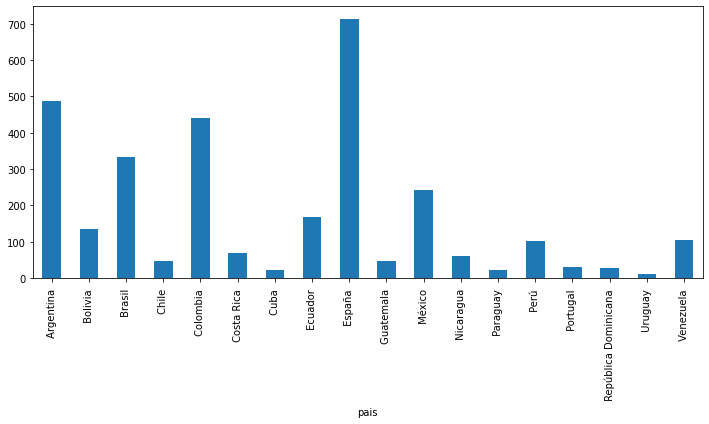

In [ ]:
df2.groupby(['pais']).count()['calificacion'].plot(kind='bar', figsize=(12,5))

# Merging both dataframes

In [ ]:
df.head().T

,0,1,2,3,4
url,https://www.newtral.es/bulo-coronavirus-pcr-hu...,https://www.newtral.es/bulo-muertes-causadas-s...,https://www.newtral.es/bulos-alemania-informe-...,https://www.newtral.es/inhalar-eucalipto-no-pr...,https://www.newtral.es/ni-italia-ha-descubiert...
reviewDate,2020-09-25T00:00:00Z,2020-09-04T00:00:00Z,2020-07-29T00:00:00Z,2020-07-21T00:00:00Z,2020-05-22T00:00:00Z
textualRating,Falso,Falso,Falso,Falso,Falso
languageCode,es,es,es,es,en
publisher.name,Newtral,Newtral,Newtral,Newtral,Newtral
publisher.site,newtral.es,newtral.es,newtral.es,newtral.es,newtral.es
title,NaN,NaN,NaN,NaN,NaN
text,Las pruebas PCR de COVID-19 detectan cualquier...,El CDC revela que solo el 6% de las muertes de...,El Ministerio del Interior alemán define al co...,Inhalar eucalipto previene y elimina el nuevo ...,El coronavirus en realidad es una trombosis qu...
claimant,NaN,NaN,NaN,NaN,NaN
claimDate,NaN,NaN,NaN,2020-07-07T00:00:00Z,NaN


In [ ]:
df2.head().T

,0,1,2,3,4
pais,Argentina,Argentina,Argentina,Argentina,Argentina
titulo,Confirmado un caso de Coronavirus en Santiago ...,Confirmado un caso de Coronavirus en Chaco.,Un médico argentino descubrió y está aplicando...,"Presidente de Argentina, Alberto Fernández: “L...","El presidente de Argentina, Alberto Fernández,..."
calificacion,Falso,Falso,Falso,Falso,Insostenible
descripcion,El Ministerio de Salud de la provincia afirmó ...,El Ministerio de Salud de la provincia afirmó ...,La OMS informa que hasta el momento no existe ...,La OMS no emitió ninguna recomendación sobre e...,Todavía no hay un consenso científico sobre el...
fecha del chequeo,27/02/2020,27/02/2020,27/02/2020,12/03/2020,12/03/2020
organizacion,Chequeado,Chequeado,Chequeado,Chequeado,Chequeado
link al chequeo,https://chequeado.com/verificacionfb/no-no-se-...,https://chequeado.com/verificacionfb/es-falso-...,https://chequeado.com/verificacionfb/es-falso-...,https://chequeado.com/ultimas-noticias/alberto...,https://chequeado.com/ultimas-noticias/alberto...
tipo de informacion,Situación de un país,Situación de un país,Curas,Curas,Características del virus
formato de la desinformacion,Imagen,Imagen,"Imagen, Texto",Audio,Audio
tipo de nota,Desinformación viral,Desinformación viral,Desinformación viral,Chequeo a figuras públicas,Chequeo a figuras públicas


In [ ]:
col = 'text'
def change_colnames(column):
  new_colnames = {
      "url": ["url", "link a la desinformacion"],
      "titulo": ["title", "titulo"],
      "texto": ["text", "descripcion"],
      "categoria": ["textualRating", "calificacion"],
      "fecha_revision": ["reviewDate", "fecha del chequeo"],
      "fecha_aparicion": ["claimDate", "fecha deteccion desinformacion"],
      "organizacion": ["publisher.name", "organizacion"]
      }
  for k, v in new_colnames.items():
    if column in v:
      return k
  return column

In [ ]:
df.columns = [change_colnames(column) for column in df.columns]
df2.columns = [change_colnames(column) for column in df2.columns]

In [ ]:
columns = df.columns.intersection(df2.columns).tolist()
merged_df = pd.concat([df[columns].copy(), df2[columns].copy()])

In [ ]:
merged_df.head()

,url,titulo,fecha_revision,categoria,organizacion,texto,fecha_aparicion
0,https://colombiacheck.com/chequeos/no-ecuador-...,"No, Ecuador no encontró la cura para el COVID-...",2020-10-08T18:36:17Z,Falso,ColombiaCheck,Ecuador venció al coronavirus,NaN
1,https://www.telemundo.com/noticias/noticias-te...,Las afirmaciones falsas y engañosas del debate...,2020-10-08T00:00:00Z,Falso,Telemundo,"""Trump llamó al coronavirus un ""fraude"".",2020-10-07T00:00:00Z
2,https://factual.afp.com/la-inscripcion-en-caja...,La inscripción en cajas de tapabocas no prueba...,2020-10-07T18:36:00Z,Falso,AFP Factual,La inscripción en las cajas de mascarillas pru...,2020-07-26T00:00:00Z
3,https://chequeado.com/ultimas-noticias/alesso-...,Alesso (CTERA): “En los lugares donde hay poco...,2020-10-07T00:00:00Z,Falso,Chequeado,En los lugares donde hay pocos casos de corona...,2020-10-07T00:00:00Z
4,https://www.univision.com/noticias/kamala-harr...,Kamala Harris: “El presidente dijo que el coro...,2020-10-07T00:00:00Z,Engañoso,Univision,Trump calificó al coronavirus como un engaño,2020-10-07T00:00:00Z


In [ ]:
merged_df['categoria'].value_counts()

Falso                1647
Falso                1173
                      606
Bulo                  302
Engañoso              167
                     ... 
Media Verdad            1
Pimenta na Língua       1
Insostenible            1
Mayormente verdad       1
No verificable          1
Name: categoria, Length: 64, dtype: int64

In [ ]:
merged_df.to_csv("raw_data_google_facts_chequeado.csv", index=False)

In [ ]:
test_df = pd.read_csv('raw_data_google_facts_chequeado.csv', na_values=' ')
test_df.tail()

,url,titulo,fecha_revision,categoria,organizacion,texto,fecha_aparicion
4649,https://maldita.es/app/uploads/2020/10/BULO.jpg,"El chalet de Aravaca (Madrid, España) que desa...",05/10/2020,Falso,Maldita.es,El ex presidente español Zapatero no es el pro...,NaN
4650,https://maldita.es/app/uploads/2020/10/BULO-no...,Una imagen de teléfonos descolgados en un cent...,05/10/2020,Falso,Maldita.es,"No es España, es Polonia. En la foto aparece e...",NaN
4651,NaN,The Lancet ha negado la existencia de la COVID...,05/10/2020,Falso,Maldita.es,"The Lancet no niega que haya una pandemia, sol...",NaN
4652,https://www.newtral.es/wp-content/uploads/2020...,Una imagen de una patente en Países Bajos de u...,05/10/2020,Falso,Newtral.es,"Un bulo en redes sociales indica que, en 2015,...",NaN
4653,NaN,Imágenes sobre un supuesto levantamiento socia...,06/10/2020,Engañoso,Newtral.es,"El vídeo, manipulado, mezcla imágenes de manif...",NaN


In [ ]:
test_df.isnull().sum()

url                2175
titulo              123
fecha_revision      115
categoria           608
organizacion          0
texto                54
fecha_aparicion    3544
dtype: int64

In [ ]:
def is_img(url):
  print(url)
  to_filter = ['jpg', 'JPG' 'jpeg', 'png', 'drive.google', 'photos', 
               'youtube' 'googleusercontent', 'Image', ]
  for f in to_filter:
    if f in str(url):
      print(url, f)
      return True
  
  return False

test_df['not_text'] = test_df['url'].apply(is_img)

In [ ]:
urls_to_scrap = test_df[(~test_df['url'].isnull()) & (~test_df['not_text'])]['url']

In [ ]:
for u in urls_to_scrap:
  print(u)

https://colombiacheck.com/chequeos/no-ecuador-no-encontro-la-cura-para-el-covid-19-ni-mando-al-carajo-la-oms
https://www.telemundo.com/noticias/noticias-telemundo/elecciones-eeuu-2020/las-afirmaciones-falsas-y-enganosas-que-verificamos-durante-el-debate-entre-harris-y-pence-tmna3838914
https://factual.afp.com/la-inscripcion-en-cajas-de-tapabocas-no-prueba-que-sean-inutiles-para-frenar-la-propagacion-de-covid
https://chequeado.com/ultimas-noticias/alesso-ctera-en-los-lugares-donde-hay-pocos-casos-de-coronavirus-hay-clases/
https://www.univision.com/noticias/kamala-harris-trump-califico-al-virus-como-un-engano
https://maldita.es/malditobulo/2020/10/02/ninos-13-anos-nina-6-anos-muertos-alemania-uso-mascarilla/
https://maldita.es/malditobulo/2020/10/06/no-ni-la-gripe-mata-mas-que-la-covid19-ni-el-coronavirus-se-ha-saltado-suecia-como-dice-este-video/
https://factual.afp.com/las-fotos-del-epidemiologo-espanol-fernando-simon-sin-mascarilla-son-del-10-de-marzo-0
https://factual.afp.com/paragu

In [ ]:
data = '/content/drive/My Drive/Colab Notebooks/saturdays_ai/final_project/data/names.csv'
df_bcc = pd.read_csv(data, encoding='latin-1')
df_bcc

,url,author,date,description,sitename,title,text
0,https://www.bbc.com/mundo/noticias-internacion...,BBC News Mundo,2020-10-08,"Según su médico, Sean Conley, el mandatario no...",BBC News Mundo,"Trump dice que contraer la covid-19 fue ""una b...","Trump dice que contraer la covid-19 fue ""una b..."
1,https://www.bbc.com/mundo/noticias-internacion...,BBC News Mundo,2020-10-06,El pronto regreso de Trump a la Casa Blanca en...,BBC News Mundo,3 riesgos en los que incurre Trump al regresar...,Trump con covid-19: 3 riesgos en los que incur...
2,https://www.bbc.com/mundo/noticias-internacion...,BBC News Mundo,2020-10-07,Cerca de 16 personas cercanas al presidente de...,BBC News Mundo,Los gráficos que muestran las personas cercana...,Coronavirus en la Casa Blanca: los gráficos qu...
3,https://www.bbc.com/mundo/noticias-54442077,BBC News Mundo,2020-10-09,Científicos de la Universidad de Oxford y MIT ...,BBC News Mundo,El gráfico que te ayuda a evaluar el riesgo de...,Covid-19: el gráfico que te ayuda a evaluar el...
4,https://www.bbc.com/mundo/noticias-54386816,BBC News Mundo,2020-10-09,El hecho de que la enfermedad se exacerba cuan...,BBC News Mundo,"""El covid-19 no es una pandemia"": los científi...","""El covid-19 no es una pandemia"": los científi..."
5,https://www.bbc.com/mundo/noticias-54463663,BBC News Mundo,2020-10-09,Un nuevo estudio afirma que el mayor factor de...,BBC News Mundo,"El gen ""prácticamente idéntico"" que comparten ...","Coronavirus: el gen ""prácticamente idéntico"" q..."
6,https://www.bbc.com/mundo/noticias-internacion...,BBC News Mundo,2020-10-04,Tal como anunció él mismo en su cuenta de Twit...,BBC News Mundo,Lo que se sabe (y lo que no) sobre el estado d...,Trump sale del hospital: lo que se sabe (y lo ...
7,https://www.bbc.com/mundo/noticias-54465394,BBC News Mundo,2020-10-08,El tratamiento diferenciado que reciben las pe...,BBC News Mundo,Qué es el síndrome VIP y por qué puede ser un ...,Trump con covid-19: qué es el síndrome VIP y p...
8,https://www.bbc.com/mundo/noticias-54458516,BBC News Mundo,2020-10-08,Crear la falsa esperanza de que vamos a contar...,BBC News Mundo,10 razones para ser realistas sobre la vacuna ...,Vacuna contra la covid-19: 10 razones para ser...
9,https://www.bbc.com/mundo/noticias-54434271,BBC News Mundo,2020-10-07,Para la mayoría de las personas que se infecta...,BBC News Mundo,"Qué es la ""covid-19 crónica"" y por qué a algun...","Coronavirus: qué es la ""covid-19 crónica"" y po..."


In [ ]:
import os
os.getcwdb()


b'/content'